

Реализация алгоритма Грассбергера-Прокачча для оценки корреляционной размерности множества

- Предполагается, что есть только временной ряд скалярных значений, поступающих из динамической системы.
- Предполагается, что временная задержка известна


Функция будет использоваться для нахождения идеальной размерности вложения m, в которой можно развернуть аттрактор.

# Пример реализации алгоритма Грассбергера-Прокачча

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import GP_algorithm as gp

plt.rcParams['figure.figsize'] = [5, 5]

Код для генерации временных рядов из динамической системы Лоренца был напрямую скопирован с https://matplotlib.org/stable/gallery/mplot3d/lorenz_attractor.html.

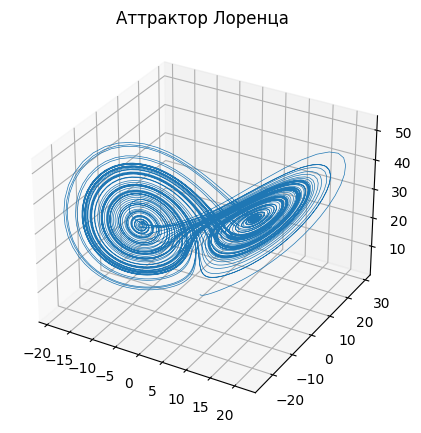

In [10]:
def lorenz(x, y, z, s=10, r=28, b=2.667):
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot

dt = 0.01
num_steps = 10000

xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)

xs[0], ys[0], zs[0] = (0., 1., 1.05)
for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)

# Plot the attractor
ax = plt.figure().add_subplot(projection='3d')
ax.plot(xs, ys, zs, lw=0.5)
ax.set_title("Аттрактор Лоренца")
plt.show()

# Временные ряды - измерения X

Чтобы протестировать алгоритм Гроссбергера-Прокаччиа, мы будем использовать ранее сгенерированные временные ряды, поступающие из X, для восстановления обратно фазового пространства (предполагается, что у нас есть данные, у которых мы не знаем исходную детерминированную модель, и у нас есть только временные ряды скаляров), а затем для оценки размерность корреляции.

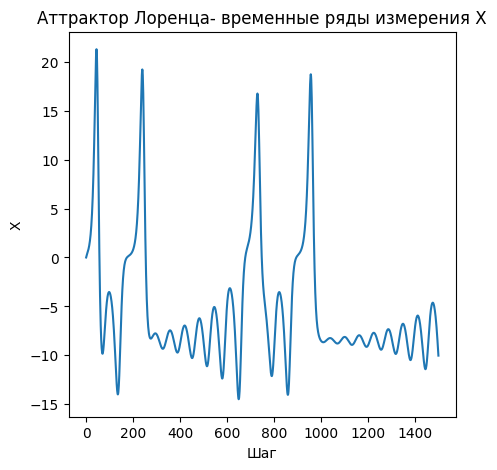

In [11]:

plt.plot(range(num_steps)[:1500], xs[:1500])
plt.title("Аттрактор Лоренца- временные ряды измерения X")
plt.xlabel("Шаг")
plt.ylabel("X")
plt.show()

# Корреляционная размерность временного ряда X

Следуя теореме Такенса, необходимая размерность вложения для реконструкции равна 2*dim (в 2 раза больше исходной размерности).
Сумма корреляции C(r) масштабируется как r^{D}. Таким образом, размерность корреляции может быть реконструирована на логарифмическом графике.

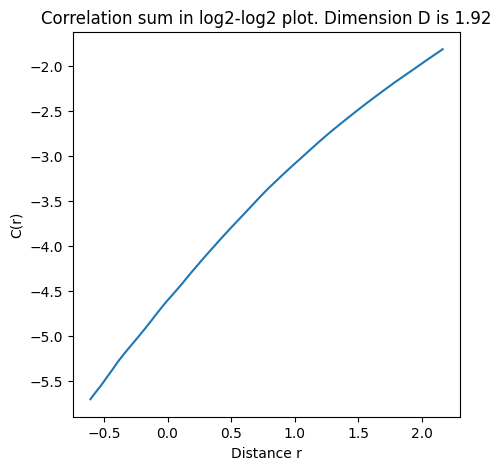

In [7]:

emb_dim = 3
time_delay = 20
timeseries = xs[:1500]

D = gp.grassberg_procaccia(timeseries,emb_dim,time_delay,plot = True)

## Поиск наилучшей размерности вложения для аттрактора с использованием корреляционной размерности

Мы вычисляем корреляционную размерность для различных возможных размерностей вложения для временного ряда X скалярных значений, полученных из исходной системы. Мы обнаруживаем, что D достигает плато при размерности вложения, равном 3, как исходное. Также обратите внимание, что размерность, заданная теоремой Такенса, является только верхним пределом. Может быть достаточно более низкой размерности вложения

In [12]:

Ds = []

for emb_dim in range(1,8):
    
    time_delay = 20
    timeseries = xs[:1500]
    
    D = gp.grassberg_procaccia(timeseries,emb_dim,time_delay,plot = False)
    Ds.append(D)


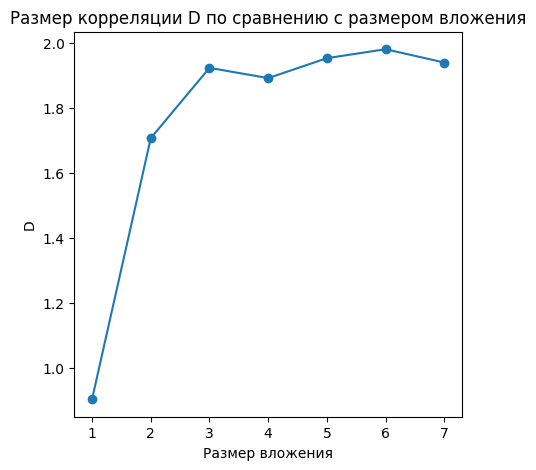

In [13]:

plt.plot(range(1,8),Ds,'o-')
plt.xlabel("Размер вложения")
plt.ylabel("D")
plt.title("Размер корреляции D по сравнению с размером вложения")
plt.show()